In [1]:
'''Import libraries'''
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
import pickle

In [2]:
'''Load csv file'''
data = pd.read_csv("mbti_1.csv")

# Data preprocessing 

In [3]:
dataframe = data.copy()

In [4]:
def prepocessing_regex(text):
    text=re.sub(r'\|\|\|', r'', text) # removing |||
    text=re.sub(r'http\S+', r'', text) # removing http.
    text=text.replace(".", "").replace(",","").replace('+', '').replace(":","").replace('"','').replace("'",'')
    text=text.replace(";",'').replace('?',"").replace('_____','').replace('-','').replace('/','').replace("@","")
    text=text.replace("!",'')
    text=re.sub(r'[()]', '', text) # removing '(' or ')'
    text=re.sub(r'[<>]', '', text) # removing '<' or '>'
    text=text.replace("*","").lower()
    text=re.sub("[^a-zA-Z]"," ",text) #keep only words
    prepocessed_text=text
    
    stop_words = (stopwords.words('english')) 
    # mbti types will be removed in the posts for training and test 
    stop_words.extend(('infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 
                   'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj',
                   'INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 
                   'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'))
    stop_words=set(stop_words)
    word_tokens=word_tokenize(prepocessed_text)
    word_tokenized_preprocessed=[]

    for token in word_tokens:
        if token not in stop_words:
            word_tokenized_preprocessed.append(token)
    # converting list to string       
    s=word_tokenized_preprocessed
    converting_stopwords = ' '.join(map(str, s))
    stop_words=[converting_stopwords]
    
    return stop_words

In [5]:
def Lemmantization(prepocessed_words):
    n=WordNetLemmatizer()
    words_for_lemman=prepocessed_words
    lemmantized_word=[n.lemmatize(w) for w in words_for_lemman]
    # converting list to string
    to_str=lemmantized_word
    lemmantized_word=' '.join(map(str, to_str))
    
    return lemmantized_word

In [6]:
# texts are preprocessed and stop words are removed
dataframe['processed'] = dataframe['posts'].apply(prepocessing_regex)


In [7]:
#applying lemmatization
dataframe['lemmantized'] = dataframe['processed'].apply(Lemmantization)

In [8]:
#consider clean data

df = dataframe[['type', 'lemmantized']]

In [32]:
vect=CountVectorizer(
                             #analyzer = 'word',
                             tokenizer=None, 
                             preprocessor = None, 
                             stop_words = None, 
                             #ngram_range=(1, 3), 
                             max_df=.8,
                             min_df=3,                        
                             max_features = 2000
                            )

In [33]:
X =  vect.fit_transform(df["lemmantized"]) 

In [34]:
le = LabelEncoder()
y = le.fit_transform(df["type"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

accuracy_scores = {}

bayes = MultinomialNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracy_scores['Naive Bayes'] = acc* 100.0 
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 42.18%


In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracy_scores['Logistic Regression'] = acc* 100.0 
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 43.26%


In [15]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracy_scores['Decision Tree'] = acc* 100.0 
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 35.54%


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracy_scores['Random Forest'] = acc* 100.0 
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 43.53%


In [17]:
#training time is more

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracy_scores['SVM'] = acc*100.0
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 44.99%


In [18]:
pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['accuracy_scores(%)'])

,accuracy_scores(%)
Naive Bayes,42.182098
Logistic Regression,43.257779
Decision Tree,35.535920
Random Forest,43.526700
SVM,44.986554


In [36]:
dataframe['ie'] = dataframe.type
dataframe['ns'] = dataframe.type
dataframe['ft'] = dataframe.type
dataframe['pj'] = dataframe.type

dataframe.head()

,type,posts,processed,lemmantized,ie,ns,ft,pj
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,[moments sportscenter top ten plays prankswhat...,moments sportscenter top ten plays prankswhat ...,INFJ,INFJ,INFJ,INFJ
1,ENTP,'I'm finding the lack of me in these posts ver...,[im finding lack posts alarmingsex boring posi...,im finding lack posts alarmingsex boring posit...,ENTP,ENTP,ENTP,ENTP
2,INTP,'Good one _____ https://www.youtube.com/wat...,[good one course say know thats blessing curse...,good one course say know thats blessing cursed...,INTP,INTP,INTP,INTP
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",[dear enjoyed conversation day esoteric gabbin...,dear enjoyed conversation day esoteric gabbing...,INTJ,INTJ,INTJ,INTJ
4,ENTJ,'You're fired.|||That's another silly misconce...,[youre firedthats another silly misconception ...,youre firedthats another silly misconception a...,ENTJ,ENTJ,ENTJ,ENTJ


In [37]:
#splitting data for each personality type

for i, t in enumerate(dataframe.type):
    if 'I' in t:
        dataframe.ie[i] = 'I'
    elif 'E' in t:
        dataframe.ie[i] = 'E'
        
    if 'N' in t:
        dataframe.ns[i] = 'N'
    elif 'S' in t:
        dataframe.ns[i] = 'S'
        
    if 'F' in t:
        dataframe.ft[i] = 'F'
    elif 'T' in t:
        dataframe.ft[i] = 'T'
        
    if 'P' in t:
        dataframe.pj[i] = 'P'
    elif 'J' in t:
        dataframe.pj[i] = 'J'


dataframe.head()

,type,posts,processed,lemmantized,ie,ns,ft,pj
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,[moments sportscenter top ten plays prankswhat...,moments sportscenter top ten plays prankswhat ...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,[im finding lack posts alarmingsex boring posi...,im finding lack posts alarmingsex boring posit...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,[good one course say know thats blessing curse...,good one course say know thats blessing cursed...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",[dear enjoyed conversation day esoteric gabbin...,dear enjoyed conversation day esoteric gabbing...,I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,[youre firedthats another silly misconception ...,youre firedthats another silly misconception a...,E,N,T,J


In [38]:
posts_1 = dataframe.posts.values
y_IE = dataframe.ie.values
y_NS = dataframe.ns.values
y_FT = dataframe.ft.values
y_PJ = dataframe.pj.values
y_1 = dataframe.type

In [39]:
X_1 =  vect.fit_transform(dataframe["lemmantized"]) 

In [40]:
#split data for splitted personality type

xIETrain, xIETest, yIETrain, yIETest = train_test_split(X_1, y_IE, test_size=0.30, stratify=y_IE, random_state=42)
xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X_1, y_NS, test_size=0.30, stratify=y_NS, random_state=42)
xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X_1, y_FT, test_size=0.30, stratify=y_FT, random_state=42)
xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X_1, y_PJ, test_size=0.30, stratify=y_PJ, random_state=42)

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


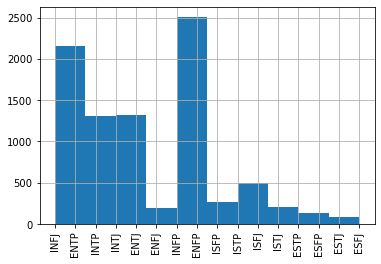

In [23]:
'''In cell below we can see that there is great unbalance in Introvert/Extrovert and Intuition/Sensing pairs. 
Whereas Feeling/Thinking and Perception/Judgment pairs are quite balanced.
Although we have created trained models for each pair. Only last 2 pairs are somewhat reliable in predicting MBTI type.
So it is not advised to depend on first 2 pairs i.e. IE and NS pairs. 
'''

print(dataframe.type.value_counts())
dataframe.type.hist(xrot=90)
plt.show()

I    6676
E    1999
Name: ie, dtype: int64

N    7478
S    1197
Name: ns, dtype: int64

F    4694
T    3981
Name: ft, dtype: int64

P    5241
J    3434
Name: pj, dtype: int64



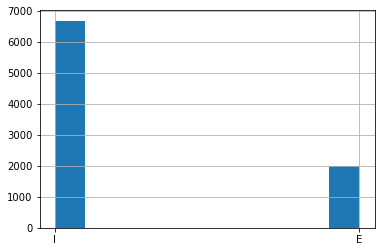

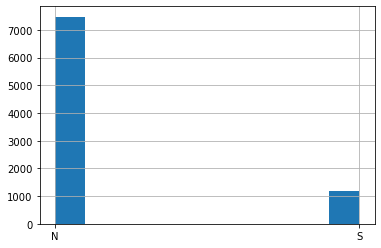

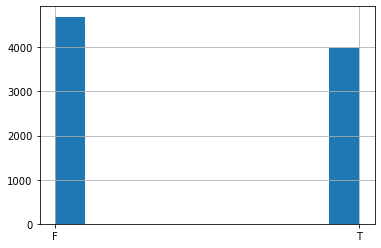

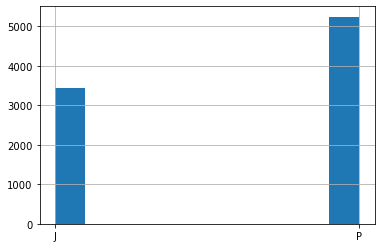

In [24]:
print(dataframe.ie.value_counts(), end='\n\n')
print(dataframe.ns.value_counts(), end='\n\n')
print(dataframe.ft.value_counts(), end='\n\n')
print(dataframe.pj.value_counts(), end='\n\n')

dataframe.ie.hist()
plt.show()
dataframe.ns.hist()
plt.show()
dataframe.ft.hist()
plt.show()
dataframe.pj.hist()
plt.show()

In [26]:
#training method to fit model
def train_model(model, X_train, y_train):

    return model.fit(X_train, y_train)

In [25]:
#del acc

In [27]:
# calculate accuracy to each model
acc = {}

def accuracy(model, y_test, y_predict):
    
    acc[model] = accuracy_score(y_test,y_predict)

In [28]:
# predict accuracy for each model

def predict_value(trained_model, X_test):
    
    return trained_model.predict(X_test)

In [29]:
# save pickle file
def pickle_file(filename, trained_model):
    
    pickle.dump(trained_model, open(filename, 'wb'))

In [41]:
#apply logistic regression
lr = LogisticRegression()

IE_model_1 = train_model(lr, xIETrain, yIETrain)
#save pickle file 
filename='IE_model_1.pkl'
pickle_file(filename, IE_model_1)
#predict values
y_prediction_IE_1 = predict_value(IE_model_1, xIETest)
accuracy('LogisticRegression_IE', yIETest, y_prediction_IE_1)


NS_model_1 = train_model(lr, xNSTrain, yNSTrain)
#save pickle file 
filename='NS_model_1.pkl'
pickle_file(filename, NS_model_1)
#predict values
y_prediction_NS_1 = predict_value(NS_model_1, xNSTest)
accuracy('LogisticRegression_NS', yNSTest, y_prediction_NS_1)


FT_model_1 = train_model(lr, xFTTrain, yFTTrain)
#save pickle file 
filename='FT_model_1.pkl'
pickle_file(filename, FT_model_1)
#predict values
y_prediction_FT_1 = predict_value(FT_model_1, xFTTest)
accuracy('LogisticRegression_FT', yFTTest, y_prediction_FT_1)


JP_model_1 = train_model(lr, xPJTrain, yPJTrain)
#save pickle file 
filename='JP_model_1.pkl'
pickle_file(filename, JP_model_1)
#predict values
y_prediction_JP_1 = predict_value(JP_model_1, xPJTest)
accuracy('LogisticRegression_JP', yPJTest, y_prediction_JP_1)


In [30]:
#apply Naive bayes 
nby = MultinomialNB()

IE_model_2 = train_model(nby, xIETrain, yIETrain)
y_prediction_IE_2 = predict_value(IE_model_2, xIETest)
accuracy('Naive_Bayes_IE', yIETest, y_prediction_IE_2)

NS_model_2 = train_model(nby, xNSTrain, yNSTrain)
y_prediction_NS_2 = predict_value(NS_model_2, xNSTest)
accuracy('Naive_Bayes_NS', yNSTest, y_prediction_NS_2)


FT_model_2 = train_model(nby, xFTTrain, yFTTrain)
y_prediction_FT_2 = predict_value(FT_model_2, xFTTest)
accuracy('Naive_Bayes_FT', yFTTest, y_prediction_FT_2)

JP_model_2 = train_model(nby, xPJTrain, yPJTrain)
y_prediction_JP_2 = predict_value(JP_model_2, xPJTest)
accuracy('Naive_Bayes_JP', yPJTest, y_prediction_JP_2)


In [31]:
# apply decision tree 
dtree = DecisionTreeClassifier(random_state=0)

IE_model_3 = train_model(dtree, xIETrain, yIETrain)
y_prediction_IE_3 = predict_value(IE_model_3, xIETest)
accuracy('Decision_Tree_IE', yIETest, y_prediction_IE_3)

NS_model_3 = train_model(dtree, xNSTrain, yNSTrain)
y_prediction_NS_3 = predict_value(NS_model_3, xNSTest)
accuracy('Decision_Tree_NS', yNSTest, y_prediction_NS_3)

FT_model_3 = train_model(dtree, xFTTrain, yFTTrain)
y_prediction_FT_3 = predict_value(FT_model_3, xFTTest)
accuracy('Decision_Tree_FT', yFTTest, y_prediction_FT_3)

JP_model_3 = train_model(dtree, xPJTrain, yPJTrain)
y_prediction_JP_3 = predict_value(JP_model_3, xPJTest)
accuracy('Decision_Tree_JP', yPJTest, y_prediction_JP_3)


In [32]:
# apply random forest
rftree = RandomForestClassifier(n_estimators=100, random_state = 1)

IE_model_4 = train_model(rftree, xIETrain, yIETrain)
y_prediction_IE_4 = predict_value(IE_model_4, xIETest)
accuracy('Random_Forest_IE', yIETest, y_prediction_IE_4)

NS_model_4 = train_model(rftree, xNSTrain, yNSTrain)
y_prediction_NS_4 = predict_value(NS_model_4, xNSTest)
accuracy('Random_Forest_NS', yNSTest, y_prediction_NS_4)

FT_model_4 = train_model(rftree, xFTTrain, yFTTrain)
y_prediction_FT_4 = predict_value(FT_model_4, xFTTest)
accuracy('Random_Forest_FT', yFTTest, y_prediction_FT_4)

JP_model_4 = train_model(rftree, xPJTrain, yPJTrain)
y_prediction_JP_4 = predict_value(JP_model_4, xPJTest)
accuracy('Random_Forest_JP', yPJTest, y_prediction_JP_4)


In [31]:
# apply support vector machine

svm_1 = SVC(random_state = 1)

IE_model_5 = train_model(svm_1, xIETrain, yIETrain)
#save pickle file 
filename='IE_model_5.pkl'
pickle_file(filename, IE_model_5)
#predict values
y_prediction_IE_5 = predict_value(IE_model_5, xIETest)
accuracy('SVM_IE', yIETest, y_prediction_IE_5)

NS_model_5 = train_model(svm_1, xNSTrain, yNSTrain)
#save pickle file 
filename='NS_model_5.pkl'
pickle_file(filename, NS_model_5)
#predict values
y_prediction_NS_5 = predict_value(NS_model_5, xNSTest)
accuracy('SVM_NS', yNSTest, y_prediction_NS_5)


FT_model_5 = train_model(svm_1, xFTTrain, yFTTrain)
#save pickle file 
filename='FT_model_5.pkl'
pickle_file(filename, FT_model_5)
#predict values
y_prediction_FT_5 = predict_value(FT_model_5, xFTTest)
accuracy('SVM_FT', yFTTest, y_prediction_FT_5)


JP_model_5 = train_model(svm_1, xPJTrain, yPJTrain)
#save pickle file 
filename='JP_model_5.pkl'
pickle_file(filename, JP_model_5)
#predict values
y_prediction_JP_5 = predict_value(JP_model_5, xPJTest)
accuracy('SVM_JP', yPJTest, y_prediction_JP_5)

In [34]:
#print accuracy for each model

for key, value in acc.items():
    print(f"{key} : {value:.2f}")

LogisticRegression_IE : 0.75
LogisticRegression_NS : 0.83
LogisticRegression_FT : 0.74
LogisticRegression_JP : 0.68
Naive_Bayes_IE : 0.75
Naive_Bayes_NS : 0.82
Naive_Bayes_FT : 0.79
Naive_Bayes_JP : 0.69
Decision_Tree_IE : 0.71
Decision_Tree_NS : 0.80
Decision_Tree_FT : 0.63
Decision_Tree_JP : 0.64
Random_Forest_IE : 0.77
Random_Forest_NS : 0.86
Random_Forest_FT : 0.74
Random_Forest_JP : 0.68
SVM_IE : 0.80
SVM_NS : 0.86
SVM_FT : 0.79
SVM_JP : 0.73


In [68]:
#applying other evaluation metrics 

from sklearn.metrics import classification_report, recall_score

#minority classes using logistic regression 
print('MINORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_1, pos_label='E'))
print(recall_score(yNSTest, y_prediction_NS_1, pos_label='S'))
print(recall_score(yFTTest, y_prediction_FT_1, pos_label='T'))
print(recall_score(yPJTest, y_prediction_JP_1, pos_label='J'), end='\n\n')

# majority classes using logistic regression 
print('MAJORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_1, pos_label='I'))
print(recall_score(yNSTest, y_prediction_NS_1, pos_label='N'))
print(recall_score(yFTTest, y_prediction_FT_1, pos_label='F'))
print(recall_score(yPJTest, y_prediction_JP_1, pos_label='P'))

MINORITY CLASSES:
0.49166666666666664
0.3871866295264624
0.7263598326359832
0.5728155339805825

MAJORITY CLASSES:
0.8242636045931103
0.9032976827094474
0.7464488636363636
0.7431659249841068


In [69]:
#minority classes using Naive bayes
print('MINORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_2, pos_label='E'))
print(recall_score(yNSTest, y_prediction_NS_2, pos_label='S'))
print(recall_score(yFTTest, y_prediction_FT_2, pos_label='T'))
print(recall_score(yPJTest, y_prediction_JP_2, pos_label='J'), end='\n\n')

# majority classes using Naive bayes
print('MAJORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_2, pos_label='I'))
print(recall_score(yNSTest, y_prediction_NS_2, pos_label='N'))
print(recall_score(yFTTest, y_prediction_FT_2, pos_label='F'))
print(recall_score(yPJTest, y_prediction_JP_2, pos_label='P'))

MINORITY CLASSES:
0.5433333333333333
0.5515320334261838
0.7882845188284519
0.6048543689320388

MAJORITY CLASSES:
0.8122815776335497
0.8618538324420677
0.7947443181818182
0.7488874761602035


In [70]:
#minority classes using Decision Tree
print('MINORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_3, pos_label='E'))
print(recall_score(yNSTest, y_prediction_NS_3, pos_label='S'))
print(recall_score(yFTTest, y_prediction_FT_3, pos_label='T'))
print(recall_score(yPJTest, y_prediction_JP_3, pos_label='J'), end='\n\n')

# majority classes using Decision Tree
print('MAJORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_3, pos_label='I'))
print(recall_score(yNSTest, y_prediction_NS_3, pos_label='N'))
print(recall_score(yFTTest, y_prediction_FT_3, pos_label='F'))
print(recall_score(yPJTest, y_prediction_JP_3, pos_label='P'))

MINORITY CLASSES:
0.405
0.3008356545961003
0.601673640167364
0.5339805825242718

MAJORITY CLASSES:
0.8042935596605092
0.8810160427807486
0.6569602272727273
0.7132867132867133


In [71]:
#minority classes using Random Forest
print('MINORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_4, pos_label='E'))
print(recall_score(yNSTest, y_prediction_NS_4, pos_label='S'))
print(recall_score(yFTTest, y_prediction_FT_4, pos_label='T'))
print(recall_score(yPJTest, y_prediction_JP_4, pos_label='J'), end='\n\n')

# majority classes using Random Forest
print('MAJORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_4, pos_label='I'))
print(recall_score(yNSTest, y_prediction_NS_4, pos_label='N'))
print(recall_score(yFTTest, y_prediction_FT_4, pos_label='F'))
print(recall_score(yPJTest, y_prediction_JP_4, pos_label='P'))

MINORITY CLASSES:
0.005
0.0
0.6142259414225941
0.2621359223300971

MAJORITY CLASSES:
0.9995007488766849
1.0
0.8544034090909091
0.9459631277813096


In [72]:
#minority classes using SVM
print('MINORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_5, pos_label='E'))
print(recall_score(yNSTest, y_prediction_NS_5, pos_label='S'))
print(recall_score(yFTTest, y_prediction_FT_5, pos_label='T'))
print(recall_score(yPJTest, y_prediction_JP_5, pos_label='J'), end='\n\n')

# majority classes using SVM
print('MAJORITY CLASSES:')
print(recall_score(yIETest, y_prediction_IE_5, pos_label='I'))
print(recall_score(yNSTest, y_prediction_NS_5, pos_label='N'))
print(recall_score(yFTTest, y_prediction_FT_5, pos_label='F'))
print(recall_score(yPJTest, y_prediction_JP_5, pos_label='P'))

MINORITY CLASSES:
0.17833333333333334
0.0
0.7740585774058577
0.45436893203883494

MAJORITY CLASSES:
0.9850224663005491
0.999554367201426
0.8096590909090909
0.9097266369993643


In [73]:
#find recall, precision, f1 score, and suppory for logistic regression

print(classification_report(yIETest, y_prediction_IE_1), end='\n\n')
print(classification_report(yNSTest, y_prediction_NS_1), end='\n\n')
print(classification_report(yFTTest, y_prediction_FT_1), end='\n\n')
print(classification_report(yPJTest, y_prediction_JP_1), end='\n\n')

              precision    recall  f1-score   support

           E       0.46      0.49      0.47       600
           I       0.84      0.82      0.83      2003

    accuracy                           0.75      2603
   macro avg       0.65      0.66      0.65      2603
weighted avg       0.75      0.75      0.75      2603


              precision    recall  f1-score   support

           N       0.90      0.90      0.90      2244
           S       0.39      0.39      0.39       359

    accuracy                           0.83      2603
   macro avg       0.65      0.65      0.65      2603
weighted avg       0.83      0.83      0.83      2603


              precision    recall  f1-score   support

           F       0.76      0.75      0.75      1408
           T       0.71      0.73      0.72      1195

    accuracy                           0.74      2603
   macro avg       0.74      0.74      0.74      2603
weighted avg       0.74      0.74      0.74      2603


              pr

In [44]:
#find recall, precision, f1 score, and support for naive bayes

print(classification_report(yIETest, y_prediction_IE_2), end='\n\n')
print(classification_report(yNSTest, y_prediction_NS_2), end='\n\n')
print(classification_report(yFTTest, y_prediction_FT_2), end='\n\n')
print(classification_report(yPJTest, y_prediction_JP_2), end='\n\n')

              precision    recall  f1-score   support

           E       0.48      0.58      0.53       505
           I       0.86      0.81      0.84      1664

    accuracy                           0.76      2169
   macro avg       0.67      0.70      0.68      2169
weighted avg       0.78      0.76      0.76      2169


              precision    recall  f1-score   support

           N       0.93      0.88      0.90      1862
           S       0.44      0.59      0.50       307

    accuracy                           0.84      2169
   macro avg       0.68      0.73      0.70      2169
weighted avg       0.86      0.84      0.85      2169


              precision    recall  f1-score   support

           F       0.78      0.80      0.79      1158
           T       0.76      0.74      0.75      1011

    accuracy                           0.77      2169
   macro avg       0.77      0.77      0.77      2169
weighted avg       0.77      0.77      0.77      2169


              pr

In [45]:
#find recall, precision, f1 score, and support for decision tree

print(classification_report(yIETest, y_prediction_IE_3), end='\n\n')
print(classification_report(yNSTest, y_prediction_NS_3), end='\n\n')
print(classification_report(yFTTest, y_prediction_FT_3), end='\n\n')
print(classification_report(yPJTest, y_prediction_JP_3), end='\n\n')

              precision    recall  f1-score   support

           E       0.39      0.36      0.38       505
           I       0.81      0.83      0.82      1664

    accuracy                           0.72      2169
   macro avg       0.60      0.60      0.60      2169
weighted avg       0.71      0.72      0.72      2169


              precision    recall  f1-score   support

           N       0.89      0.89      0.89      1862
           S       0.32      0.30      0.31       307

    accuracy                           0.81      2169
   macro avg       0.60      0.60      0.60      2169
weighted avg       0.80      0.81      0.81      2169


              precision    recall  f1-score   support

           F       0.66      0.66      0.66      1158
           T       0.61      0.61      0.61      1011

    accuracy                           0.64      2169
   macro avg       0.63      0.63      0.63      2169
weighted avg       0.64      0.64      0.64      2169


              pr

In [46]:
#find recall, precision, f1 score, and support for random forest

print(classification_report(yIETest, y_prediction_IE_4), end='\n\n')
print(classification_report(yNSTest, y_prediction_NS_4), end='\n\n')
print(classification_report(yFTTest, y_prediction_FT_4), end='\n\n')
print(classification_report(yPJTest, y_prediction_JP_4), end='\n\n')

              precision    recall  f1-score   support

           E       1.00      0.01      0.02       505
           I       0.77      1.00      0.87      1664

    accuracy                           0.77      2169
   macro avg       0.88      0.50      0.44      2169
weighted avg       0.82      0.77      0.67      2169


              precision    recall  f1-score   support

           N       0.86      1.00      0.92      1862
           S       0.00      0.00      0.00       307

    accuracy                           0.86      2169
   macro avg       0.43      0.50      0.46      2169
weighted avg       0.74      0.86      0.79      2169


              precision    recall  f1-score   support

           F       0.72      0.88      0.79      1158
           T       0.81      0.60      0.69      1011

    accuracy                           0.75      2169
   macro avg       0.76      0.74      0.74      2169
weighted avg       0.76      0.75      0.74      2169


              pr

In [47]:
#find recall, precision, f1 score, and support for svm

print(classification_report(yIETest, y_prediction_IE_5), end='\n\n')
print(classification_report(yNSTest, y_prediction_NS_5), end='\n\n')
print(classification_report(yFTTest, y_prediction_FT_5), end='\n\n')
print(classification_report(yPJTest, y_prediction_JP_5), end='\n\n')

              precision    recall  f1-score   support

           E       0.83      0.13      0.23       505
           I       0.79      0.99      0.88      1664

    accuracy                           0.79      2169
   macro avg       0.81      0.56      0.55      2169
weighted avg       0.80      0.79      0.73      2169


              precision    recall  f1-score   support

           N       0.86      1.00      0.92      1862
           S       1.00      0.01      0.01       307

    accuracy                           0.86      2169
   macro avg       0.93      0.50      0.47      2169
weighted avg       0.88      0.86      0.80      2169


              precision    recall  f1-score   support

           F       0.80      0.85      0.83      1158
           T       0.81      0.76      0.79      1011

    accuracy                           0.81      2169
   macro avg       0.81      0.81      0.81      2169
weighted avg       0.81      0.81      0.81      2169


              pr

Actual Value
I    1635
E     534
dtype: int64

Predicted Value
I    1618
E     551
dtype: int64



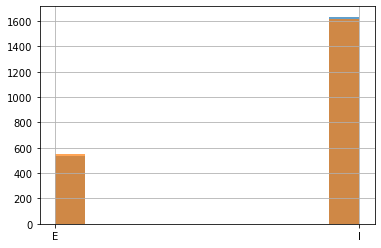

In [43]:
#showing actual value and predicted value for logistic regression 

print("Actual Value")
print(pd.Series(yIETest).value_counts(), end='\n\n')
print("Predicted Value")
print(pd.Series(y_prediction_IE_1).value_counts(), end='\n\n')

pd.Series(yIETest).hist(alpha=0.7)
pd.Series(y_prediction_IE_1).hist(alpha=0.7)
plt.show()

Actual Value
N    1862
S     307
dtype: int64

N    1866
S     303
dtype: int64
Predicted Value


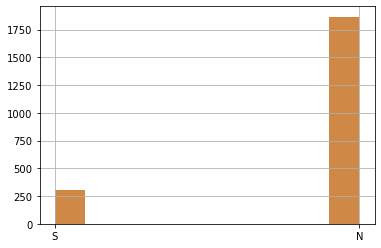

In [44]:
print("Actual Value")
print(pd.Series(yNSTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_NS_1).value_counts())
print("Predicted Value")

pd.Series(yNSTest).hist(alpha=0.7)
pd.Series(y_prediction_NS_1).hist(alpha=0.7)
plt.show()

Actual Value
F    1175
T     994
dtype: int64

F    1149
T    1020
dtype: int64
Predicted Value


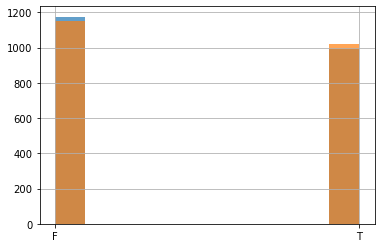

In [45]:
print("Actual Value")
print(pd.Series(yFTTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_FT_1).value_counts())
print("Predicted Value")

pd.Series(yFTTest).hist(alpha=0.7)
pd.Series(y_prediction_FT_1).hist(alpha=0.7)
plt.show()

Actual Value
P    1281
J     888
dtype: int64

P    1303
J     866
dtype: int64
Predicted Value


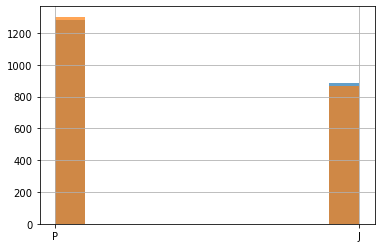

In [46]:
print("Actual Value")
print(pd.Series(yPJTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_JP_1).value_counts())
print("Predicted Value")

pd.Series(yPJTest).hist(alpha=0.7)
pd.Series(y_prediction_JP_1).hist(alpha=0.7)
plt.show()

Actual Value
I    2003
E     600
dtype: int64

Predicted Value
I    1901
E     702
dtype: int64



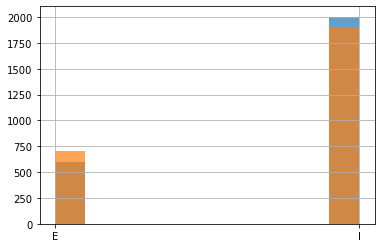

In [64]:
#showing actual value and predicted value for Naive Bayes 
print("Actual Value")
print(pd.Series(yIETest).value_counts(), end='\n\n')
print("Predicted Value")
print(pd.Series(y_prediction_IE_2).value_counts(), end='\n\n')

pd.Series(yIETest).hist(alpha=0.7)
pd.Series(y_prediction_IE_2).hist(alpha=0.7)
plt.show()

Actual Value
N    2244
S     359
dtype: int64

N    2095
S     508
dtype: int64
Predicted Value


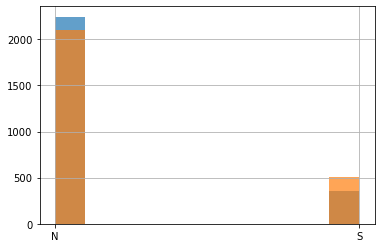

In [65]:
print("Actual Value")
print(pd.Series(yNSTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_NS_2).value_counts())
print("Predicted Value")

pd.Series(yNSTest).hist(alpha=0.7)
pd.Series(y_prediction_NS_2).hist(alpha=0.7)
plt.show()

Actual Value
F    1408
T    1195
dtype: int64

F    1372
T    1231
dtype: int64
Predicted Value


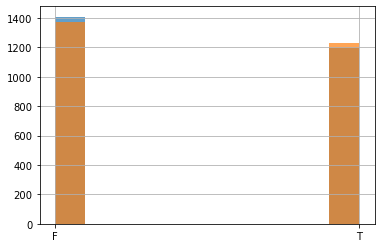

In [66]:
print("Actual Value")
print(pd.Series(yFTTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_FT_2).value_counts())
print("Predicted Value")

pd.Series(yFTTest).hist(alpha=0.7)
pd.Series(y_prediction_FT_2).hist(alpha=0.7)
plt.show()

Actual Value
P    1573
J    1030
dtype: int64

P    1585
J    1018
dtype: int64
Predicted Value


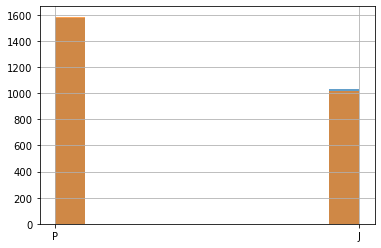

In [67]:
print("Actual Value")
print(pd.Series(yPJTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_JP_2).value_counts())
print("Predicted Value")

pd.Series(yPJTest).hist(alpha=0.7)
pd.Series(y_prediction_JP_2).hist(alpha=0.7)
plt.show()

Actual Value
I    2003
E     600
dtype: int64

I    2466
E     137
dtype: int64

Predicted Value


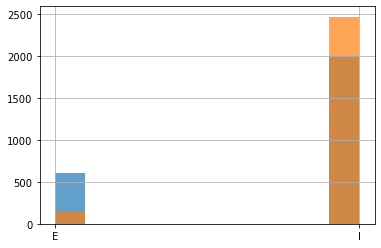

In [74]:
#showing actual value and predicted value for SVM
print("Actual Value")
print(pd.Series(yIETest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_IE_5).value_counts(), end='\n\n')
print("Predicted Value")

pd.Series(yIETest).hist(alpha=0.7)
pd.Series(y_prediction_IE_5).hist(alpha=0.7)
plt.show()

Actual Value
N    2244
S     359
dtype: int64

N    2602
S       1
dtype: int64
Predicted Value


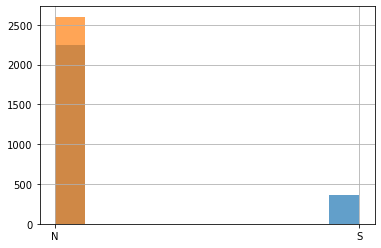

In [75]:
print("Actual Value")
print(pd.Series(yNSTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_NS_5).value_counts())
print("Predicted Value")

pd.Series(yNSTest).hist(alpha=0.7)
pd.Series(y_prediction_NS_5).hist(alpha=0.7)
plt.show()

Actual Value
F    1408
T    1195
dtype: int64

F    1410
T    1193
dtype: int64
Predicted Value


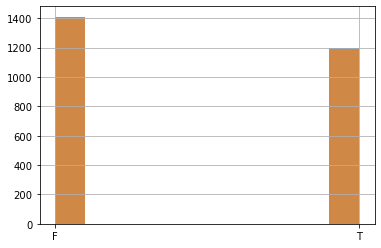

In [76]:
print("Actual Value")
print(pd.Series(yFTTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_FT_5).value_counts())
print("Predicted Value")

pd.Series(yFTTest).hist(alpha=0.7)
pd.Series(y_prediction_FT_5).hist(alpha=0.7)
plt.show()

Actual Value
P    1573
J    1030
dtype: int64

P    1993
J     610
dtype: int64
Predicted Value


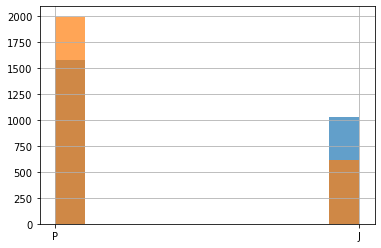

In [77]:
print("Actual Value")
print(pd.Series(yPJTest).value_counts(), end='\n\n')
print(pd.Series(y_prediction_JP_5).value_counts())
print("Predicted Value")

pd.Series(yPJTest).hist(alpha=0.7)
pd.Series(y_prediction_JP_5).hist(alpha=0.7)
plt.show()

Applying models to balancing data using oversampling and undersampling techniques 

In [30]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss

In [31]:
#Resamples the data and returns two tuples for oversampled data and undersampled data
def balance_data(X, y):
    
    sm = SMOTE()
    nm = NearMiss()
    X_sm,y_sm = sm.fit_sample(X, y)
    X_nm,y_nm = nm.fit_sample(X, y)
    return (X_sm, y_sm), (X_nm, y_nm)

In [32]:
#for logirstic regression

logreg_sm_model = train_model(lr,
                              balance_data(xIETrain, yIETrain)[0][0],
                             balance_data(xIETrain, yIETrain)[0][1])

y_pred_logreg_sm_model = predict_value(logreg_sm_model, xIETest)

logreg_nm_model = train_model(lr,
                              balance_data(xIETrain, yIETrain)[1][0],
                             balance_data(xIETrain, yIETrain)[1][1])

y_pred_logreg_nm_model = predict_value(logreg_nm_model, xIETest)

accuracy_logreg_sm_model = accuracy_score(yIETest,y_pred_logreg_sm_model)
accuracy_logreg_nm_model = accuracy_score(yIETest,y_pred_logreg_nm_model)

print("Oversampling", accuracy_logreg_sm_model)
print("Undersampling", accuracy_logreg_nm_model)

Oversampling 0.7353054168267383
Undersampling 0.5812524010756819


In [82]:
#naive bayes 

bayes_sm_model = train_model(bayes,
                              balance_data(xIETrain, yIETrain)[0][0],
                             balance_data(xIETrain, yIETrain)[0][1])


y_pred_bayes_sm_model = predict_value(bayes_sm_model, xIETest)

bayes_nm_model = train_model(bayes,
                              balance_data(xIETrain, yIETrain)[1][0],
                             balance_data(xIETrain, yIETrain)[1][1])

y_pred_bayes_nm_model = predict_value(bayes_nm_model, xIETest)


accuracy_bayes_sm_model = accuracy_score(yIETest,y_pred_bayes_sm_model)
accuracy_bayes_nm_model = accuracy_score(yIETest,y_pred_bayes_nm_model)

print("Oversampling", accuracy_bayes_sm_model)
print("Undersampling", accuracy_bayes_nm_model)

Oversampling 0.7629658086822897
Undersampling 0.5973876296580868


In [83]:
# random forest
rf_sm_model = train_model(rf,
                              balance_data(xIETrain, yIETrain)[0][0],
                             balance_data(xIETrain, yIETrain)[0][1])


y_pred_rf_sm_model = predict_value(rf_sm_model, xIETest)

rf_nm_model = train_model(rf,
                              balance_data(xIETrain, yIETrain)[1][0],
                             balance_data(xIETrain, yIETrain)[1][1])

y_pred_rf_nm_model = predict_value(rf_nm_model, xIETest)


accuracy_rf_sm_model = accuracy_score(yIETest,y_pred_rf_sm_model)
accuracy_rf_nm_model = accuracy_score(yIETest,y_pred_rf_nm_model)

print("Oversampling",accuracy_rf_sm_model)
print("Undersampling", accuracy_rf_nm_model)

Oversampling 0.7410679984633116
Undersampling 0.40991164041490585


In [84]:
#svm
svm_sm_model = train_model(svm,
                              balance_data(xIETrain, yIETrain)[0][0],
                             balance_data(xIETrain, yIETrain)[0][1])


y_pred_svm_sm_model = predict_value(svm_sm_model, xIETest)

svm_nm_model = train_model(svm,
                              balance_data(xIETrain, yIETrain)[1][0],
                             balance_data(xIETrain, yIETrain)[1][1])

y_pred_svm_nm_model = predict_value(svm_nm_model, xIETest)


accuracy_svm_sm_model = accuracy_score(yIETest,y_pred_svm_sm_model)
accuracy_svm_nm_model = accuracy_score(yIETest,y_pred_svm_nm_model)

print("Oversampling",accuracy_svm_sm_model)
print("Undersampling", accuracy_svm_nm_model)

Oversampling 0.7856319631194775
Undersampling 0.4610065309258548
